In [357]:
#import libraries 
import matplotlib.pyplot as plt
import cv2
import random
from math import cos,pi
from PIL import Image
import numpy as np
import cmath

In [358]:
image_orig = cv2.imread("woman_wet3.jpg", cv2.IMREAD_GRAYSCALE)
image = np.array(image_orig, dtype=np.uint)/255

In [359]:
def show_image(image, title):
  plt.figure(figsize=(20,5))
  plt.imshow(image, cmap='gray', vmin=image.min(), vmax=image.max())
  plt.title(title)
  plt.show()

In [360]:
m = 0.1
s = 0.05

freq1 = 1/8
freq2 = 1/32

def calc_noise_matrix(frequency):
    noise_matrix = np.zeros((256, 256))
    for row in range(noise_matrix.shape[0]):
        A = np.random.normal(m, s)
        phi = random.uniform(0, 2*pi)
        for col in range(noise_matrix.shape[1]):
            noise_matrix[row,col] = A*cos(2*pi*frequency*col + phi)
    return np.asarray(noise_matrix)

original image (zero noise) I

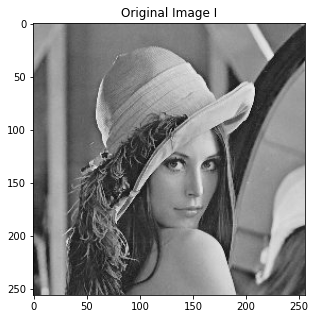

In [361]:
show_image(image, 'Original Image I')

deteriorated image I(1)

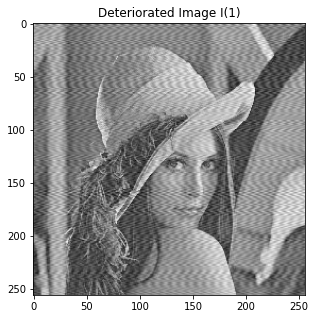

In [362]:
noise_matrix_1 = calc_noise_matrix(freq1)
deteriorated_img_1 = image + noise_matrix_1
normalized_img_1 = (deteriorated_img_1 - deteriorated_img_1.min()) / (deteriorated_img_1.max() - deteriorated_img_1.min())
show_image(normalized_img_1, 'Deteriorated Image I(1)')

deteriorated image I(2)

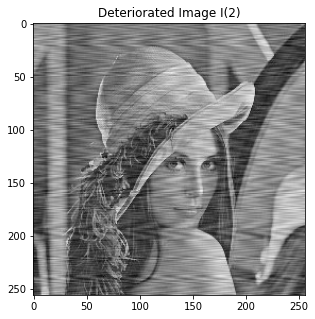

In [363]:
noise_matrix_2 = calc_noise_matrix(freq2)
deteriorated_img_2 = image + noise_matrix_2
normalized_img_2 = (deteriorated_img_2 - deteriorated_img_2.min()) / (deteriorated_img_2.max() - deteriorated_img_2.min())
show_image(normalized_img_2, 'Deteriorated Image I(2)')

deteriorated image I(12)

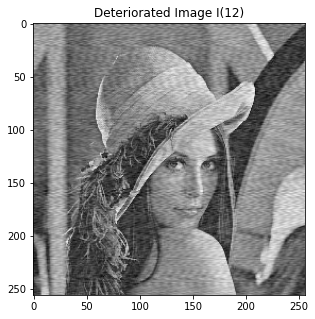

In [364]:
noise_matrix_12 = (noise_matrix_1 + noise_matrix_2)/2
deteriorated_img_12 = image + noise_matrix_12
normalized_img_12 = (deteriorated_img_12 - deteriorated_img_12.min()) / (deteriorated_img_12.max() - deteriorated_img_12.min())
show_image(normalized_img_12, 'Deteriorated Image I(12)')

DFT implementation

In [365]:
def DFT(n):
    DFT_matrix = np.zeros((n,n),complex)
    for k in range(n):
        for l in range(n):
            DFT_matrix[k][l] = np.exp(-2j*pi*k*l/n)
    return DFT_matrix/np.sqrt(n)

DFT_matrix = DFT(image.shape[1])

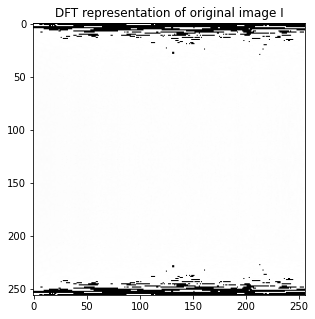

In [366]:
DFT_image0_rep = np.matmul(DFT_matrix, np.transpose(image))
show_image(np.log(np.abs((DFT_image0_rep))).astype(np.uint8), "DFT representation of original image I")

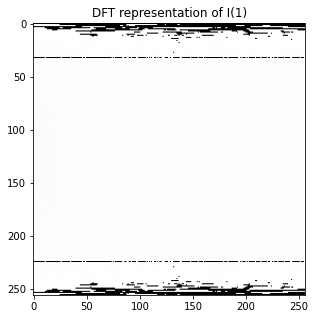

In [367]:
DFT_image1_rep = np.matmul(DFT_matrix, np.transpose(normalized_img_1))
show_image(np.log(np.abs((DFT_image1_rep))).astype(np.uint8), "DFT representation of I(1)")

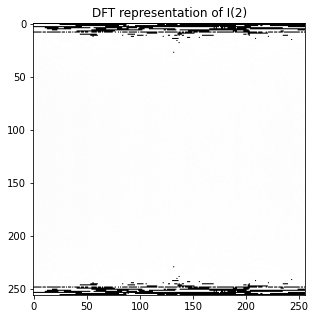

In [368]:
DFT_image2_rep = np.matmul(DFT_matrix, np.transpose(normalized_img_2))
show_image(np.log(np.abs((DFT_image2_rep))).astype(np.uint8), "DFT representation of I(2)")

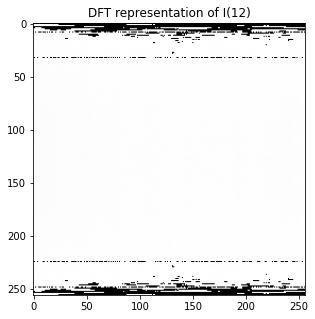

In [369]:
DFT_image12_rep = np.matmul(DFT_matrix, np.transpose(normalized_img_12))
show_image(np.log(np.abs((DFT_image12_rep))).astype(np.uint8), "DFT representation of I(12)")

## reconstracting images

Inverse DFT implementation

In [370]:
def InverseDFT(n):
    InverseDFT_matrix = np.zeros((n,n),complex)
    for k in range(n):
        for l in range(n):
            InverseDFT_matrix[k][l] = np.exp(2j*pi*k*l/n)
    return InverseDFT_matrix/np.sqrt(n)

InverseDFT_matrix = DFT(image.shape[1])

reconstraction by f value

In [371]:
def calc_reconstracted_image(noised_image, frequency1, frequency2=None):
    pre_reconstracted_image = noised_image
    pre_reconstracted_image[int(1/frequency1)] = 0
    pre_reconstracted_image[noised_image.shape[1] - int(1/frequency1)] = 0
    if frequency2:
      pre_reconstracted_image[int(1/frequency2)] = 0
      pre_reconstracted_image[noised_image.shape[1] - int(1/frequency2)] = 0
    reconstracted_image = np.transpose(InverseDFT_matrix@pre_reconstracted_image)
    return np.abs(np.flip(reconstracted_image,1))

calculate MSE

In [372]:
def calc_MSE(reconstracted_image, original_image):
    diff_image = reconstracted_image - original_image
    MSE_image = np.power(diff_image, 2)
    return np.sum(MSE_image)/((len(original_image))**2)

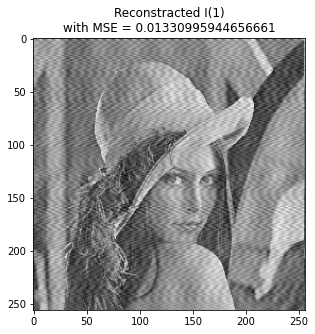

In [373]:
reconstracted_img_1 = calc_reconstracted_image(DFT_image1_rep, freq1)
mse_1 = calc_MSE(reconstracted_img_1, image)
show_image(reconstracted_img_1, f"Reconstracted I(1)\nwith MSE = {mse_1}")

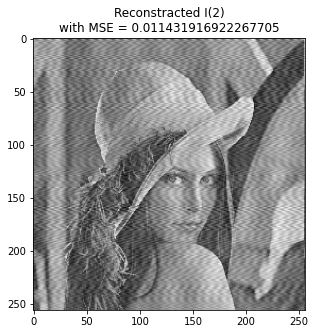

In [374]:
reconstracted_img_2 = calc_reconstracted_image(DFT_image2_rep, freq2)
mse_2 = calc_MSE(reconstracted_img_2, image)
show_image(reconstracted_img_1, f"Reconstracted I(2)\nwith MSE = {mse_2}")

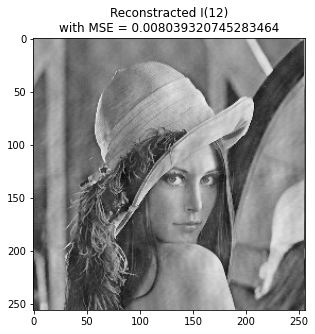

In [375]:
reconstracted_img_12 = calc_reconstracted_image(DFT_image12_rep, freq1, freq2)
mse_12 = calc_MSE(reconstracted_img_12, image)
show_image(reconstracted_img_12, f"Reconstracted I(12)\nwith MSE = {mse_12}")